## Importation des packages nécéssaires à nos prévisions

In [1]:
!pip install prophet 

In [2]:
import pandas as pd
from prophet import Prophet 
import os
import sys

## Chargement des données 

In [3]:
current_dir=os.getcwd()
project_root=os.path.abspath(os.path.join(current_dir,'..'))
print(project_root)
data_dir=os.path.join(project_root,'Data')
csv_filepath = os.path.join(data_dir,'Iowa_transportation.csv')
Df=pd.read_csv(csv_filepath)
Df

/Users/hamadoundoucoure/Documents/GitHub Project/Data-Analyse-Project/Iowa Transportation Forcasting


,timestamp,start_station_name,nbre_trajets_total
0,2015-01-04,"Abbey Orchard Street, Westminster",5
1,2015-01-05,"Abbey Orchard Street, Westminster",48
2,2015-01-06,"Abbey Orchard Street, Westminster",38
3,2015-01-07,"Abbey Orchard Street, Westminster",58
4,2015-01-08,"Abbey Orchard Street, Westminster",51
...,...,...,...
672013,2017-06-09,"York Hall, Bethnal Green",46
672014,2017-06-10,"York Hall, Bethnal Green",60
672015,2017-06-11,"York Hall, Bethnal Green",80
672016,2017-06-12,"York Hall, Bethnal Green",55


## Traitements préliminaires et prévisions avec la librairie Prophet

In [4]:
# Je renomme les variables afin qu'elles soient compatibles avec les modèles de prévisions de la librairie Prophet
# La colonne "timestamp" devient "ds" (date), et "nbre_trajets_total" devient "y" (valeur à prédire)
Df= Df.rename(columns={"timestamp": "ds", "nbre_trajets_total": "y"})

# Je groupe le nombre de trajets par dates afin de garantir une agrégation en une seule valeur.
Df2=Df.groupby(['ds']).sum(['y'])
Df2

,y
ds,
2015-01-04,9234
2015-01-05,20372
2015-01-06,20613
2015-01-07,22331
2015-01-08,15601
...,...
2017-06-09,33334
2017-06-10,36325
2017-06-11,32680


In [5]:
# J'exclu les trois derniers mois de mon jeu de données qui vont nous servir de référentiel aux test de prévisions que nous voulons effectuer sur ces mois.
Df3 = Df2[:-90]
Df3=Df3.reset_index()
Df2=Df2.reset_index()
Df3

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,22331
4,2015-01-08,15601
...,...,...
797,2017-03-11,30148
798,2017-03-12,15715
799,2017-03-13,31977
800,2017-03-14,30578


In [6]:
# J'initialiser le modèle Prophet
m = Prophet()
m.fit(Df3)

# Je crée un dataframe pour les prévisions futures
# `periods=180` indique que je  souhaite prévoir pour les 180 prochains jours
# `include_history=False` exclut les données historiques du DataFrame `future`
future = m.make_future_dataframe(periods=180, include_history= False)
future
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

19:09:36 - cmdstanpy - INFO - Chain [1] start processing
19:09:36 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2017-03-16,27280.622206,21110.195847,33799.931953
1,2017-03-17,25420.340856,19488.936932,31754.905512
2,2017-03-18,20579.085518,14774.038996,27105.226000
3,2017-03-19,19486.388016,13658.807707,26500.382021
4,2017-03-20,24356.074389,17850.152030,31133.342505
...,...,...,...,...
175,2017-09-07,36469.067954,29758.418268,42540.692170
176,2017-09-08,34896.180733,28324.509715,41094.266891
177,2017-09-09,30361.384516,23702.007101,37111.249752
178,2017-09-10,29584.039665,22894.353885,35914.601117


In [7]:
# J'extrais uniquement les colonnes 'ds' (dates) et 'yhat' (valeurs prédites)
forcast2= forecast[['ds','yhat']]
forcast2

,ds,yhat
0,2017-03-16,27280.622206
1,2017-03-17,25420.340856
2,2017-03-18,20579.085518
3,2017-03-19,19486.388016
4,2017-03-20,24356.074389
...,...,...
175,2017-09-07,36469.067954
176,2017-09-08,34896.180733
177,2017-09-09,30361.384516
178,2017-09-10,29584.039665


In [8]:
#Je convertis les colonnes 'ds' au format datetime 
forcast2['ds']=pd.to_datetime(forcast2['ds'])
forcast2.info()
Df2['ds']=pd.to_datetime(Df2['ds'])
Df3['ds']=pd.to_datetime(Df3['ds'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      180 non-null    datetime64[ns]
 1   yhat    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.9 KB


/var/folders/py/xwj_cpwx7vlgpxtnc92ptgn40000gn/T/ipykernel_52431/99811642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forcast2['ds']=pd.to_datetime(forcast2['ds'])


In [9]:
# Je fais une fusion entre les dataframe df2 et forcast2 avec comme paramètre 'outer' pour conserver toutes les lignes des deux dataframe
forcast3= pd.merge(Df2, forcast2, on='ds', how='outer')

## Affichage des prévisions

In [10]:
import matplotlib.pyplot as plt

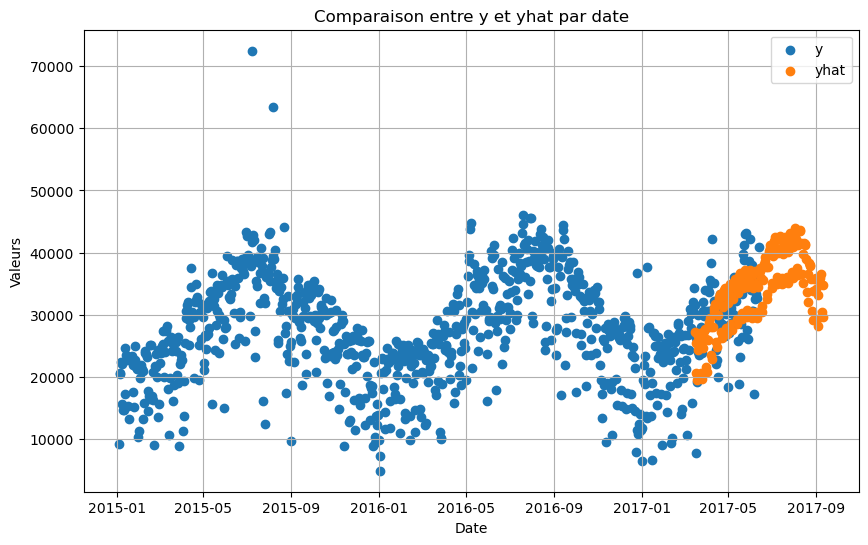

In [11]:
# Je visualise les données à l'aide d'un scatterplot 
plt.figure(figsize=(10, 6))

plt.scatter(forcast3['ds'], forcast3['y'], label='y', marker='o')
plt.scatter(forcast3['ds'], forcast3['yhat'], label='yhat', marker='o')

plt.title('Comparaison entre y et yhat par date')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.grid(True)
plt.show()